<a href="https://colab.research.google.com/github/Souha-Kabtni/Food-Sales-Predictions/blob/main/Project_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⛳ The first project will be a sales prediction for food items sold at various stores.
# **The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.**

# **➿ PART 1**

In [ ]:
# 1st: upload the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2nd: Import my to be used packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import os
import plotly.express as px


In [ ]:
# 3rd: Read the fil with pandas
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Week 2/Assingments/sales_predictions_2023.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **➿ PART 2**

**0. For me to have a general idea of my dataframe**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**1. How many rows and columns?**



In [ ]:
print(f'columns : {df.shape[1]}') # The code is asked to print the sentence columns :the number of columns
print(f'rows : {df.shape[0]}')    # The code is asked to print the sentence rows :the number of rows

columns : 12
rows : 8523


**2. What are the datatypes of each variable?**

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3. Are there duplicates? If so, drop any duplicates.**


In [ ]:
df.duplicated().sum()
# Ths output of the .duplicated().sum() gave 0 ==> We have no duplicated rows to drop in the 1st place

0

In [ ]:
# OR displaying the data frame
df[df.duplicated(keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


**4. Identify missing values.**

In [ ]:
df.isna().sum()
# The output gave 2 columns with missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).**

There are 2 columns with missing values that need to be treated:

❎ 'Item_Weight' column's missing values will be imputed with the mean of its values (as recommended by the literature)

❎ 'Outlet_Size' column's missing values will be imputed with the mode of its values (as recommended by the literature)

In [ ]:
# This is our 1st missing values in the 'Item_Weight' column

df['Item_Weight'].fillna(value =df['Item_Weight'].mean(),inplace=True )
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Now all missing values in 'Item_Weight' column are imputed with the mean of its values

df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Looking for the mode in Outlet_Size's unique values

df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# For Medium is more reccurent that the other values, NaN will be replaced by it accordingly

df['Outlet_Size'].fillna(value ='Medium',inplace=True )  # or df['Outlet_Size'].fillna(value =df['Outlet_Size'].mode(),inplace=True )
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**✅ Now our data is free from Missing values**

**6. Confirm that there are no missing values after addressing them.**

In [ ]:
df.isna().sum()
# As per the .isna().sum() diplayed above, all values are cleared from (null) values.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)**



In [ ]:
# Locate my Object columns
df_types = df.dtypes
df_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Extract my Object columns only
str_cols = df_types[df_types=="O"]
str_cols

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [ ]:
# find the index of each
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df[str_cols.index].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
str_cols = str_cols.index

In [ ]:
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in str_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna=False))
  print("\n\n")


Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT01

**❎ Found that Item_Fat_Content column contains both**

1. 'Low Fat' and 'LF', which seems to be the same, yet written differently YET read as different values by the program
2. 'Regula' and 'reg', which seems to be the same, yet written differently YET read as different values by the program

=> Replacinng both Low Fat and 'LF' by 'Low_Fat' and 'reg' by 'Regular'


In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF',"Low Fat")
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat',"Low Fat")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg',"Regular")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# OR in just ONE line
# df.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'},inplace=True)

**8. For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [ ]:
# Get the summary of my data
df_summary = df.describe()
df_summary

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# OR
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# num_df = df.select_dtypes(include=numerics)
# num_df.describe()

In [ ]:
# Extract the min from the min dataframe, df_summary
display(min)
df_summary.loc['min', :].round()

<function min>

Item_Weight                     5.0
Item_Visibility                 0.0
Item_MRP                       31.0
Outlet_Establishment_Year    1985.0
Item_Outlet_Sales              33.0
Name: min, dtype: float64

In [ ]:
# Extract the max from the max dataframe, df_summary
display(max)
df_summary.loc['max', :].round()

<function max>

Item_Weight                     21.0
Item_Visibility                  0.0
Item_MRP                       267.0
Outlet_Establishment_Year     2009.0
Item_Outlet_Sales            13087.0
Name: max, dtype: float64

In [ ]:
# Extract the min from the mean dataframe, df_summary
print('Mean')
df_summary.loc['mean', :].round()

Mean


Item_Weight                    13.0
Item_Visibility                 0.0
Item_MRP                      141.0
Outlet_Establishment_Year    1998.0
Item_Outlet_Sales            2181.0
Name: mean, dtype: float64

# **➿ PART 4 (emanating from Part 3)**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [149]:
def plot_dist1(data, xcol, ycol, hue, title, figure_size = (20, 10)):

  ## Through plt.subplots(), I am going to set the ground for a larger fig/ax before plotting

 fig, ax = plt.subplots(figsize=figure_size)

## I am going to removing my top and right borders

 ax.spines['right'].set_visible(False)
 ax.spines['top'].set_visible(False)

## I am going to plot a histogram using seaborn library

 sns.barplot(data=data, x = xcol, y = ycol, hue=hue, ax=ax)

## I am going to set my title and my font (family, size, and weight)

 ax.set_title(title, fontfamily='serif', fontsize='xx-large', fontweight='semibold');

## I am going to increase my Axis Label Font Sizes

 ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='x-large')
 ax.set_ylabel(ax.yaxis.get_label().get_text(),
              fontsize='x-large')

 plt.xticks(rotation = 45)

 ## ax.xaxis.label()
 ax.legend(loc='upper right');

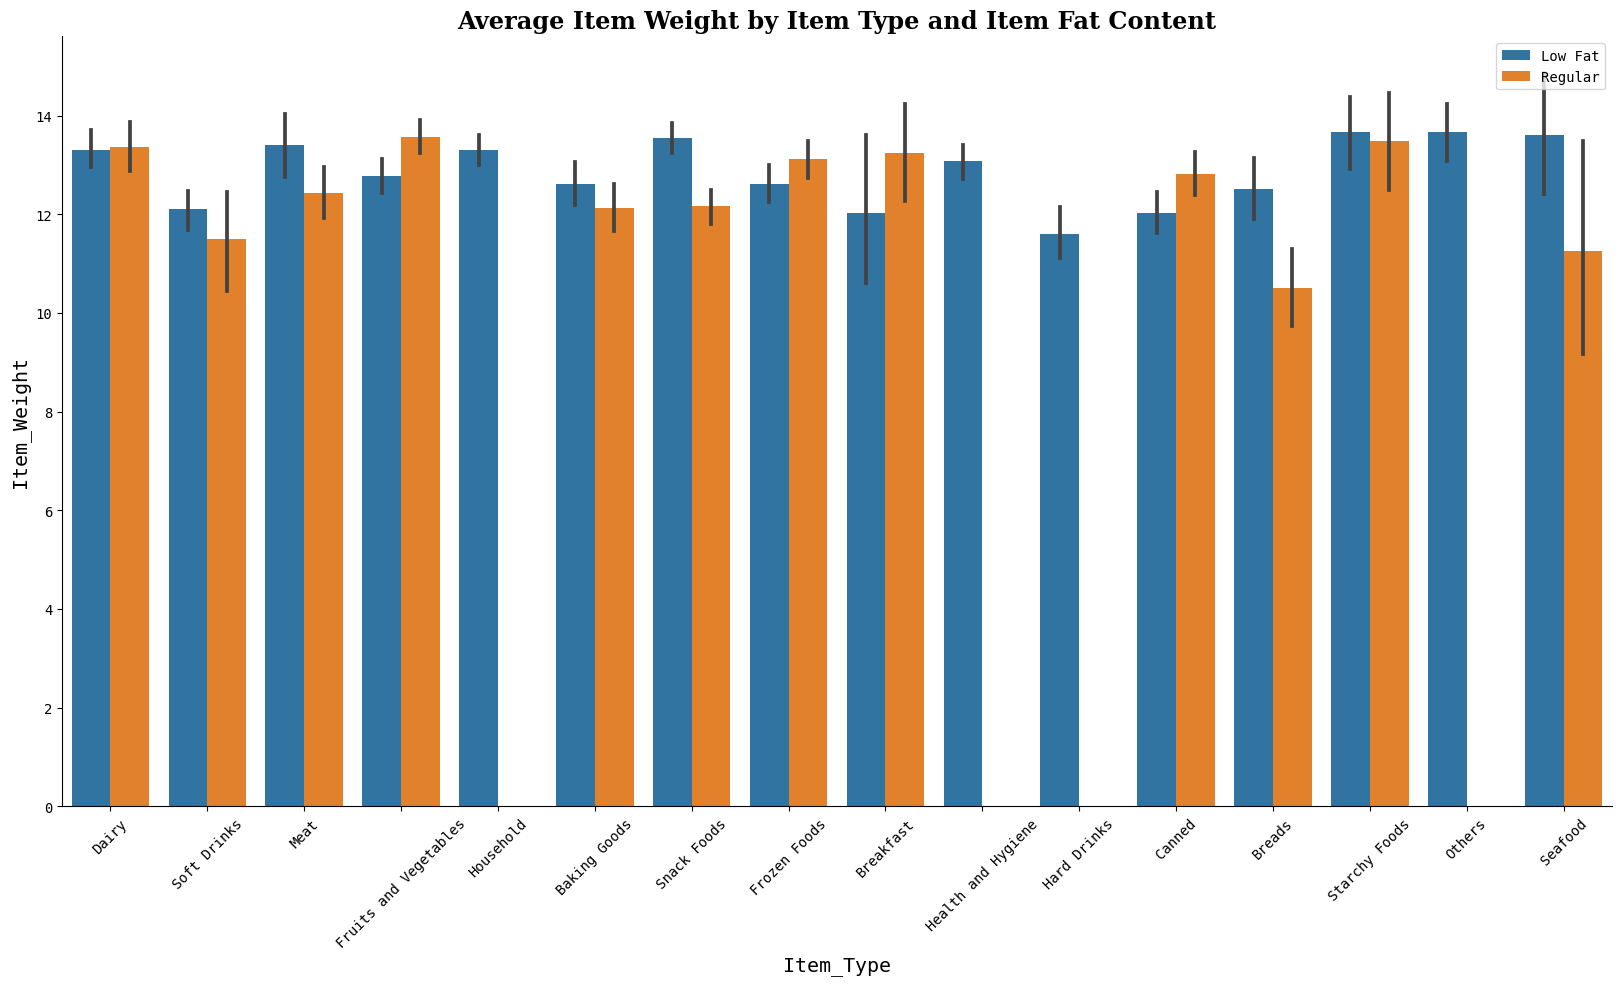

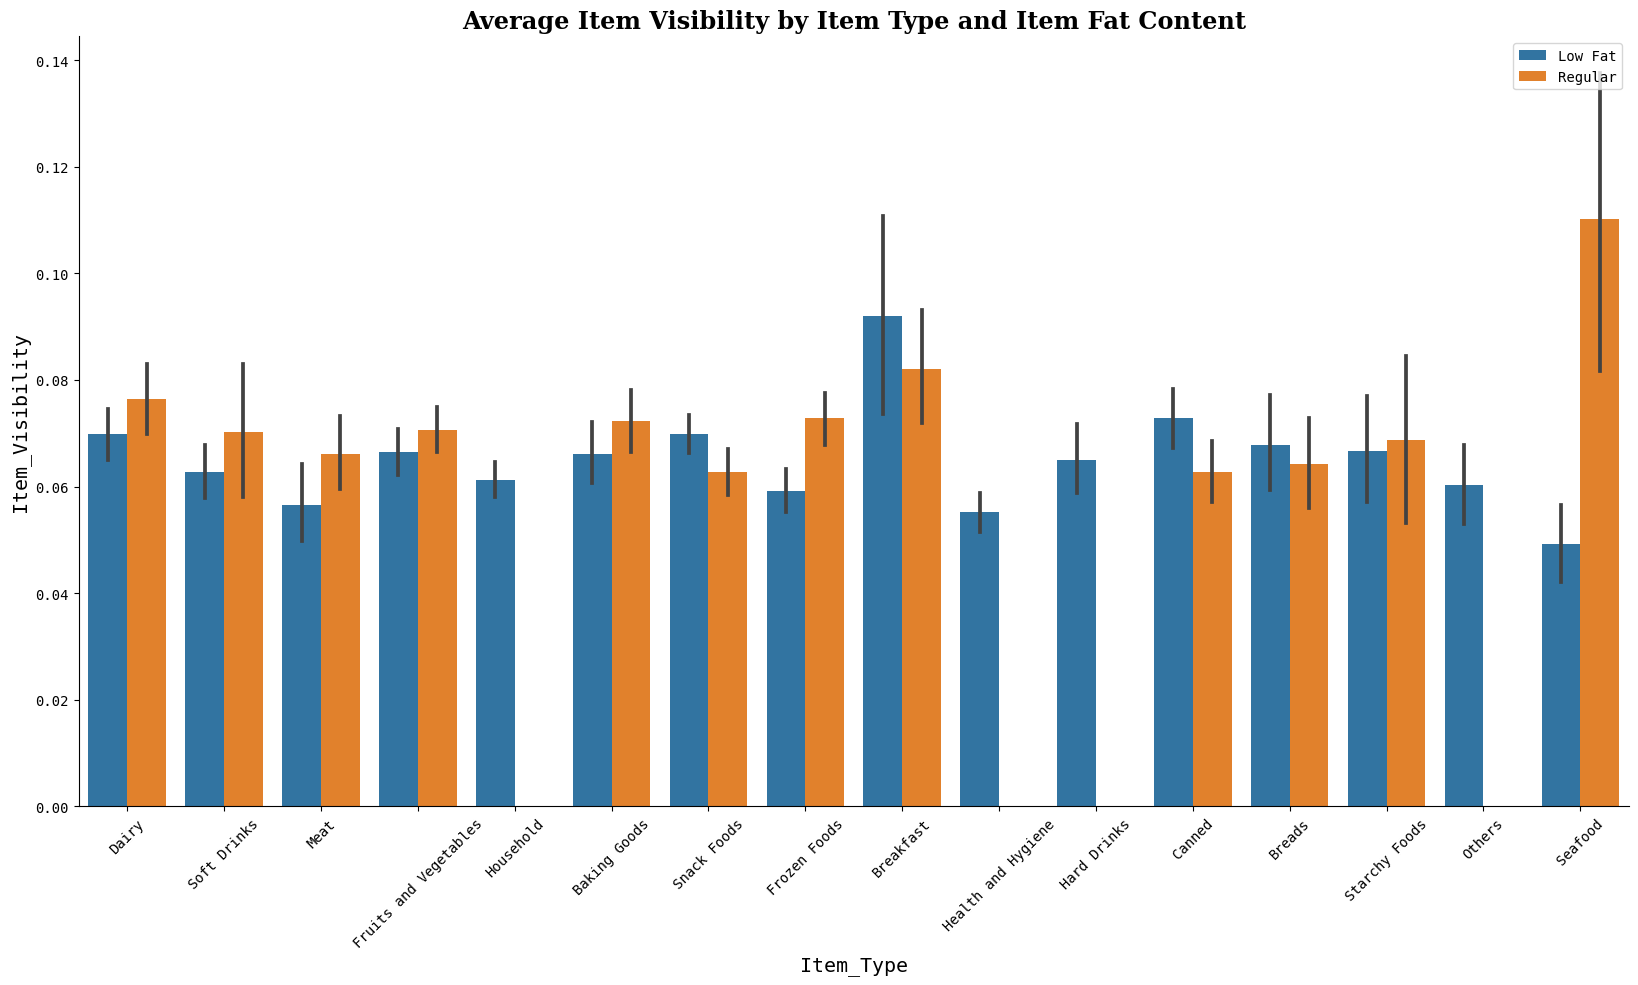

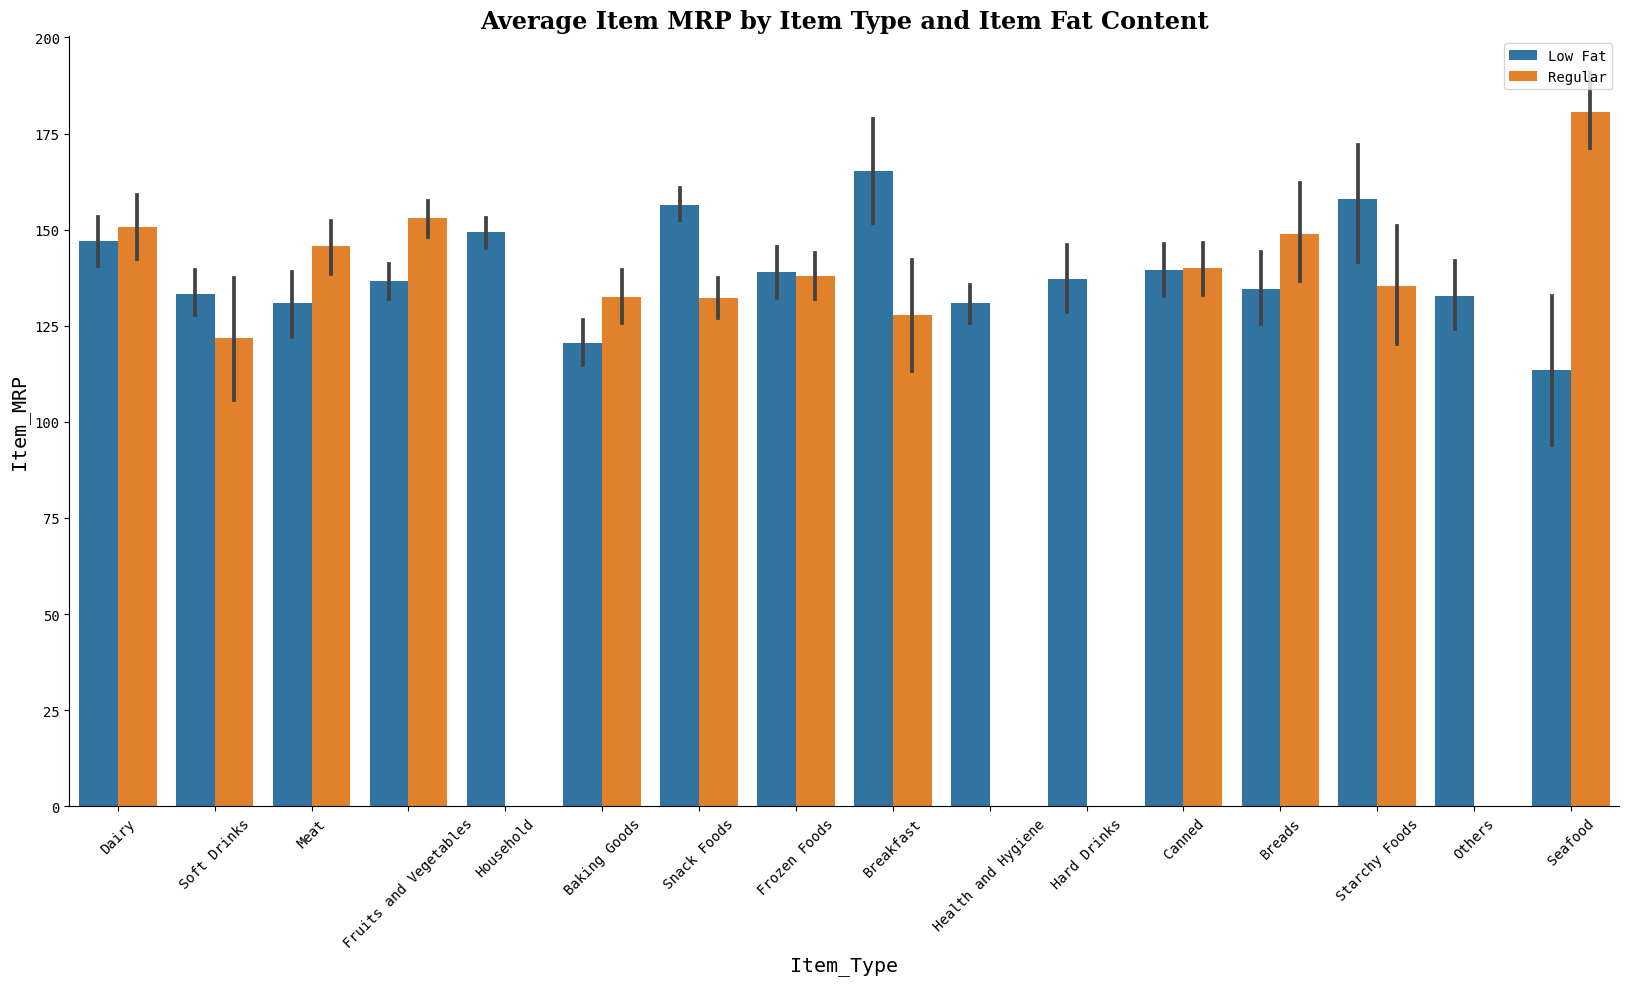

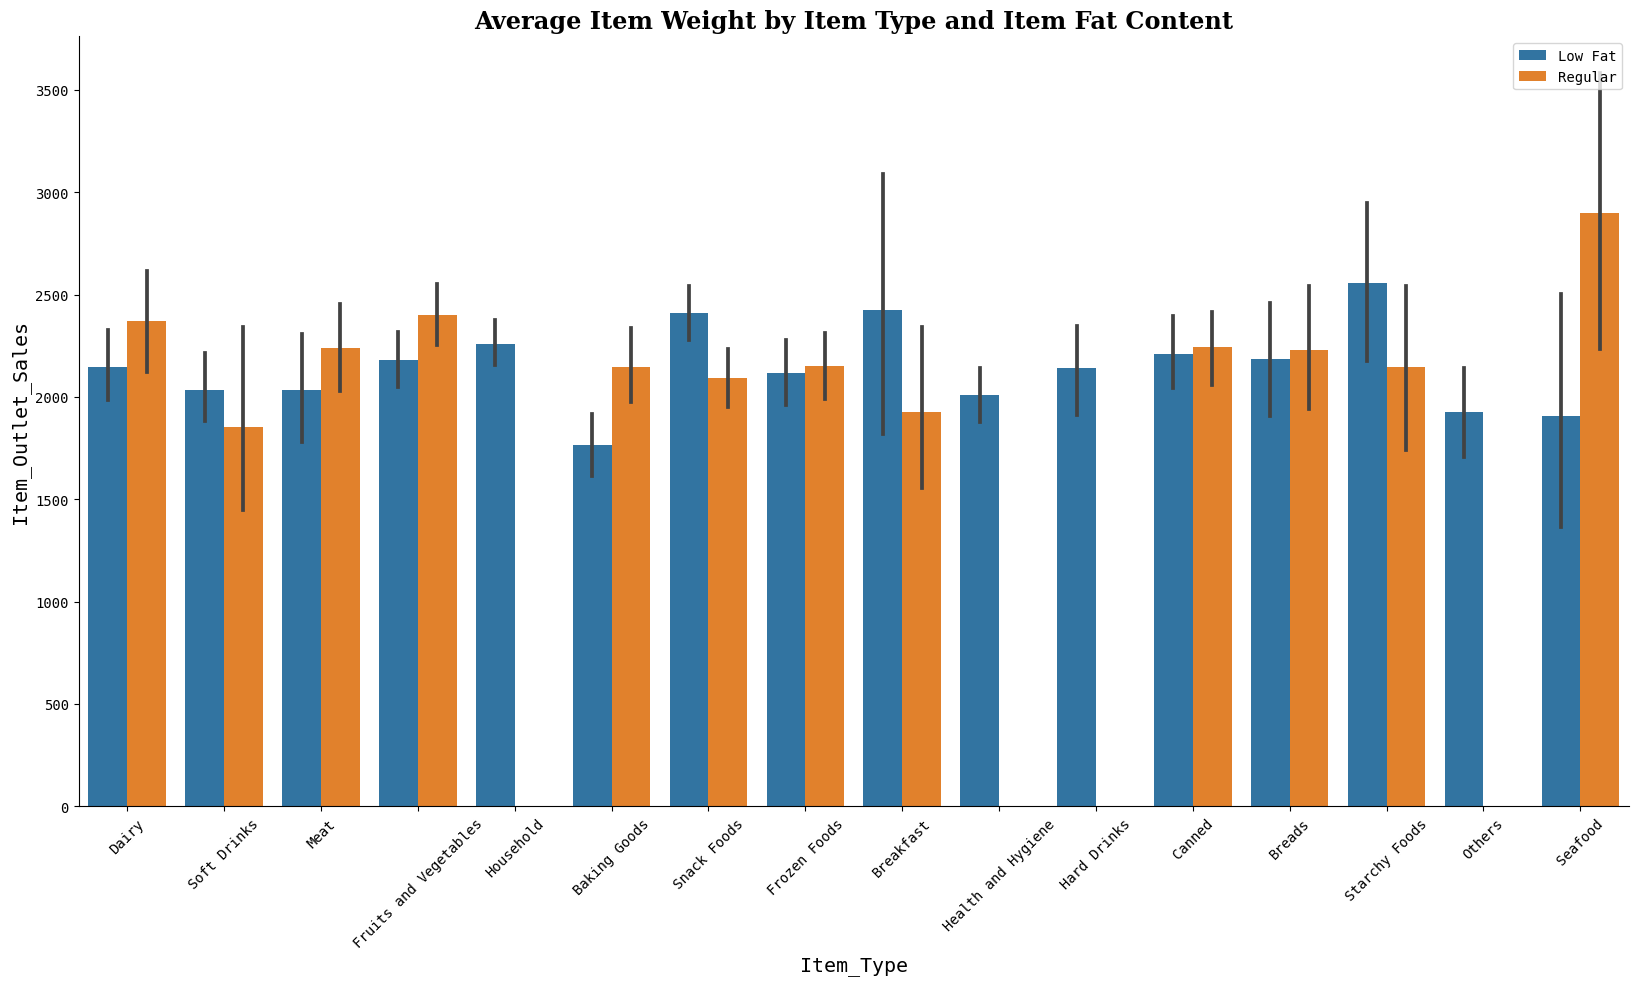

In [150]:
# Graph some examples of barplots that can come from the above created function:

plot_dist1(df, df.Item_Type, df.Item_Weight, df.Item_Fat_Content, 'Average Item Weight by Item Type and Item Fat Content')
plot_dist1(df, df.Item_Type, df.Item_Visibility, df.Item_Fat_Content, 'Average Item Visibility by Item Type and Item Fat Content')
plot_dist1(df, df.Item_Type, df.Item_MRP, df.Item_Fat_Content, 'Average Item MRP by Item Type and Item Fat Content')
plot_dist1(df, df.Item_Type, df.Item_Outlet_Sales, df.Item_Fat_Content, 'Average Item Weight by Item Type and Item Fat Content')

# **✅ Interpretation of the barplots:**

## **↪ 1st Graph:** Item weight over item type by item fat content barplot shows that although almost all items are both low in fat and regular, Hard Drinks are only low in fat.

## **↪ 2nd Graph:** Item visibility over item type by item fat content demonstrates that Seafood with regular fat is the most visible item while Breakfast has the highest visibility in terms of low fat.

## **↪ 3rd Graph:** Item MRP over item type by item fat content shows that Seafood with regular fat has the highest MRP while its low fat has the lowest MRP.

## **↪ 4th Graph:** Item outlet sales over item type by item fat content further accentuate the previous interpretation of the 3rd graph with Seafood having the highest and lowest outlet sales, regular and fat, respectively.

# **2. Studying the Distribution of my Numerical columns through Histograms**

In [165]:
# Since I have 5 Numerical columns, and to avoid repetition of codes, I will create a function for a histogram and call it plot_dist

def plot_dist(data, col, title, figure_size = (10,5)):  # def plot_dist(data, col, title, figure_size = (10,5), font_family = 'serif', font_weight = 'semibold') => Why they did not work?

## Through plt.subplots(), I am going to set the ground for a larger fig/ax before plotting

 fig, ax = plt.subplots(figsize=figure_size)

## I am going to removing my top and right borders

 ax.spines['right'].set_visible(False)
 ax.spines['top'].set_visible(False)

## I am going to plot a histogram using seaborn library

 sns.histplot(data=data, x=col, ax=ax, kde=True, line_kws={'color': 'pastel', 'lw': 5, 'ls': ':'})

## I am going to set my title and my font (family, size, and weight)

 ax.set_title(title, fontfamily='serif', fontsize='xx-large', fontweight='semibold');

## I am going to increase my Axis Label Font Sizes

 ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='x-large')
 ax.set_ylabel(ax.yaxis.get_label().get_text(),
              fontsize='x-large')

## I am going to make sales_format using the StrMethodFormatter and the format code that will display the Number format with comma separator with no decimal places (info taken from https://mkaz.blog/working-with-python/string-formatting/)

 sales_format = mpl.ticker.StrMethodFormatter('{x:,.0f}')
 ax.xaxis.set_major_formatter(sales_format)

## Annotating mean

 mean = data[col].mean()
 ax.axvline(mean,color='k', ls='solid', lw=3,
           label= f"Mean= {mean:,.2f}");

## Annotating median

 median = data[col].median()
 ax.axvline(median,color='r', ls=':', lw=3,
           label= f"Median= {median:,.2f}");


## ax.xaxis.label()
 ax.legend(loc='upper right');


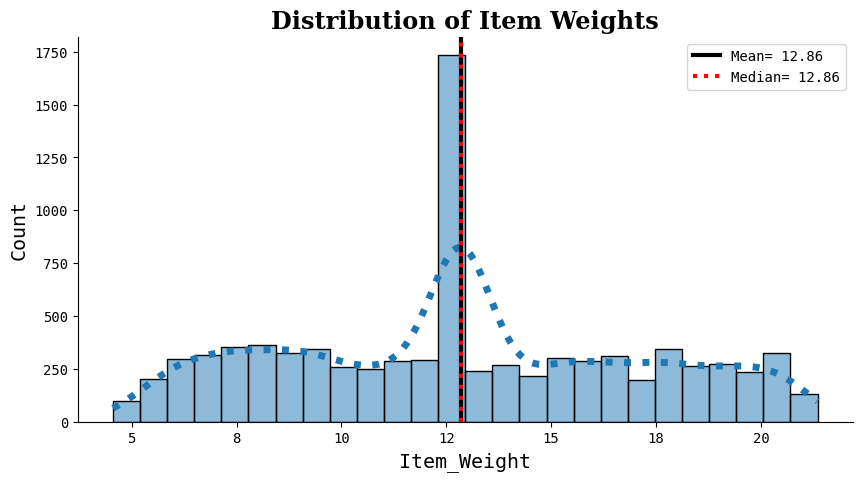

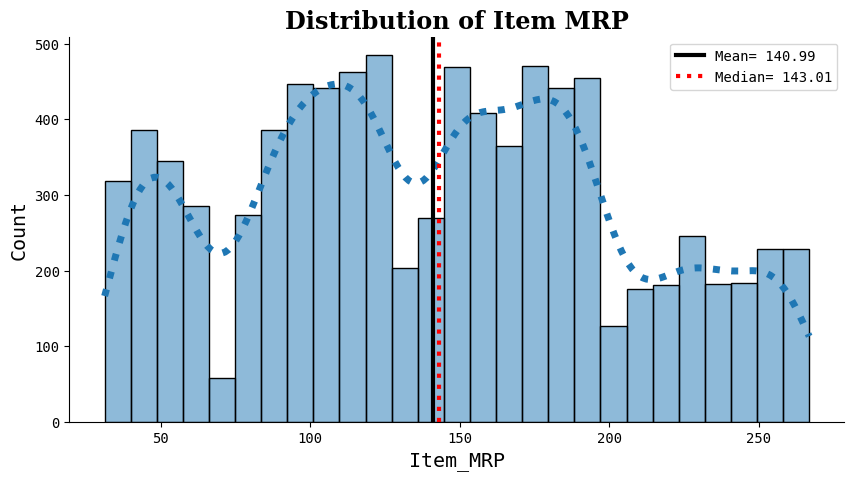

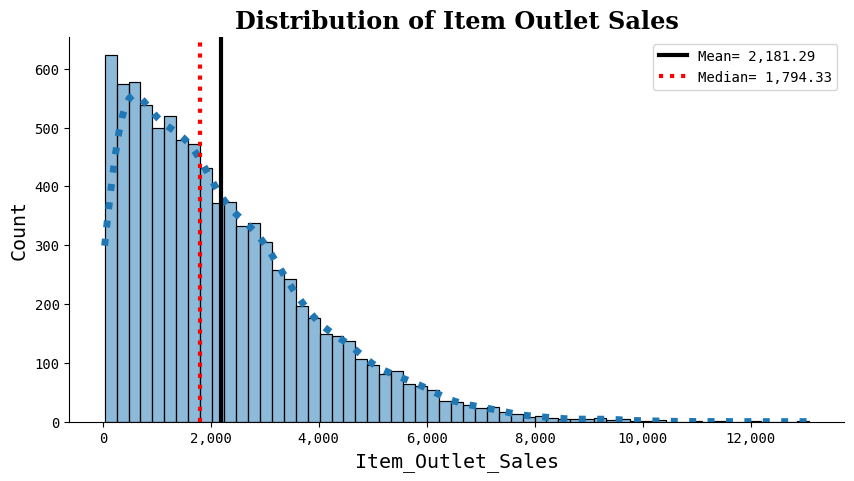

In [166]:
# Graph some examples of histograms that can come from the above created function:

plot_dist(df, 'Item_Weight', 'Distribution of Item Weights');
plot_dist(df, 'Item_MRP', 'Distribution of Item MRP');
plot_dist(df, 'Item_Outlet_Sales', 'Distribution of Item Outlet Sales');

# **✅ Interpretation of the Histograms:**

## **↪ 1st Graph:** Item weights has a normal distribution where both the mean and the median match. The 1 peak in the histogram shows that the data set is with one mode, unimodal, with a weitgh of 12 as the most frequent.

## **↪ 2nd Graph:** Item MRP has a normal distribution where both the mean and the median approximatly match. With multiple peaks to represent a data set with multiple modes, multimodal, MRPs between the intervals 100-130 and 150-200 are the most frequent.

## **↪ 3rd Graph:** The Distribution of Item Outlet Sales histograms is right/positively skewed which entails that many of the values are near the lower end of the range, and higher values are infrequent. In this case, the moset frequent distribution of Item Outlet Sales is centered between $0 to $2,000.





# 3. Correlation - Chart Type: Heatmap

In [ ]:
# I am searching for the correlation between all numercial values in my df dataframe

correlation = df.corr()
correlation

<ipython-input-133-9feed67161bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<ipython-input-134-9553c74935eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='plasma', annot=True);


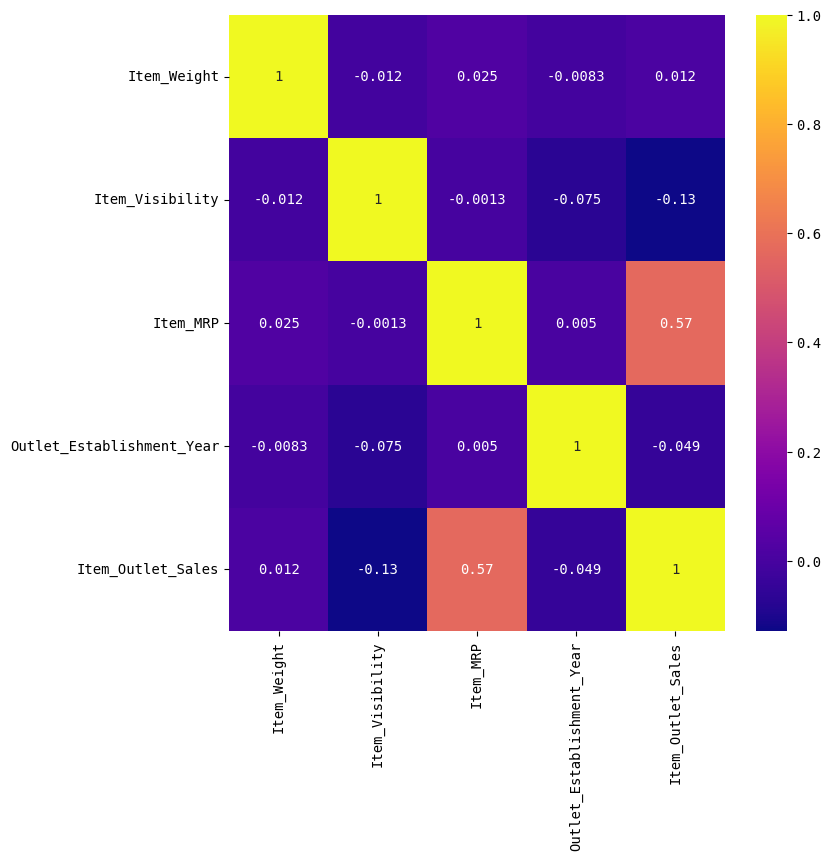

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='plasma', annot=True);

# **✅ Interpretation of the Heatmap:**

## **↪ With a positive correlation of 0.57, Item_MRP and Item_Outlet_Sales moderately correlate.**
## **↪ With a negative correlation of -0.13 and -0.049 between Item_Visibility and Outlet_Establishment_Year respectively with Item_Outlet_Sales.**

## ** ✌ Conclusion: The more the product is high in price, the more it is sold.**